In [51]:
import matplotlib.pyplot as plt
#from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import seaborn as sns
import warnings


%matplotlib inline
warnings.simplefilter(action="ignore", category=FutureWarning)

In [52]:
# Initialize random number generator

RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)

In [53]:
#Style, fonts

az.style.use("default")
hfont = {'fontname':'Cambria Math'}

In [54]:
#sns.set_style('whitegrid')
#Colors codes
# c ='#EEA47FFF'  orange
# c ='#00539CFF' blue
# color='#ff00a9'  pink

#Functions definitions
                           
def pareto_plot(df, x=None, y=None, title=None, save=False ,show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    fig, ax1 = plt.subplots(figsize=(6,4), dpi=100)
    ax1.bar(x, y, color = '#00539CFF', alpha=1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, color='#EEA47FFF', ls = '-', marker = 'o', alpha=0.6)
    ax2.set_ylabel('', color='#EEA47FFF')
    ax2.tick_params('y', colors='#EEA47FFF')
    ax2.vlines(x = 6.5, ymin=0, ymax =1, label = '80% limit ',colors = 'k', lw = 2 ,linestyles='--') 
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    plt.show()
    
    if save:
        fig.savefig('./figs/pareto.png', dpi=300)

In [55]:
# Insert a base dataframe

df = (pd.read_csv('./fatData1101.csv'))
df.steel = df.steel.astype('category')
del df['Unnamed: 15']
df['ABC']= df.A *df.B *df.C
df['ABD']= df.A *df.B *df.D
df['ACD']= df.A *df.C *df.D
df['BCD']= df.D *df.B *df.C

# Convert cycles to dB
base304 =20000
base316 =140000
df.loc[df.steel ==304 , 'logCycles'] = 20* np.log10(df.cycles/base304)
df.loc[df.steel ==316 , 'logCycles'] = 20* np.log10(df.cycles/(base316))

In [56]:
#Show prepared dataframe
cols =['regime', 'A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD','ABC', 'ABD', 'ACD', 'BCD',
       'polyLen', 'cycles', 'logCycles', 'steel' ]
df = df[cols]
df.head()

,regime,A,B,C,D,AB,AC,AD,BC,BD,CD,ABC,ABD,ACD,BCD,polyLen,cycles,logCycles,steel
0,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,1,1011,162938,18.219848,304
1,1,-1,-1,-1,1,1,1,-1,1,-1,-1,-1,1,1,1,1011,159084,18.011930,304
2,2,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,2231,70028,10.884835,304
3,2,-1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,1,2231,419450,26.433004,304
4,3,-1,1,-1,-1,-1,1,1,-1,-1,1,1,1,-1,1,1783,152720,17.657318,304


In [30]:
# saving the dataframe
df.to_csv('./fatData1102.csv')

In [13]:
#Cycles column descriptive
df_steels_cycles = df[['cycles']].groupby(df.steel).describe()
df_steels_cycles.round(0)

cycles                                                                 \
       count       mean        std       min       25%       50%        75%   
steel                                                                         
304     32.0   152909.0   101099.0   23929.0   61192.0  152450.0   234882.0   
316     32.0  1353132.0  1422401.0  138868.0  418176.0  694903.0  1807082.0   

                  
             max  
steel             
304     419450.0  
316    6022466.0

In [14]:
#logCycles column descriptive
df_steels_logcycles = df[['logCycles']].groupby(df.steel)
df_steels_logcycles.describe().round(2)

logCycles                                              
          count   mean   std   min   25%    50%    75%    max
steel                                                        
304        32.0  15.35  6.98  1.56  9.71  17.64  21.39  26.43
316        32.0  15.45  8.81 -0.07  9.50  13.68  22.22  32.67

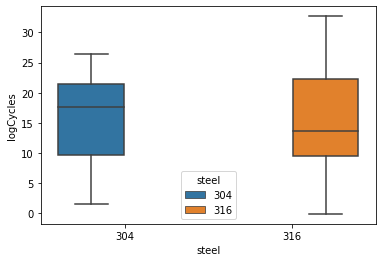

In [38]:
#Descriptive statistics boxplot logCycles
boxfig = plt.figure()
boxfig.add_axes(sns.boxplot( y="logCycles", x="steel", hue='steel' ,data =df));
#boxfig.savefig('./figs/box_plot.png', dpi=300)

In [22]:
print(df.logCycles.mean())

15.40095162805276


# Effects visualisation

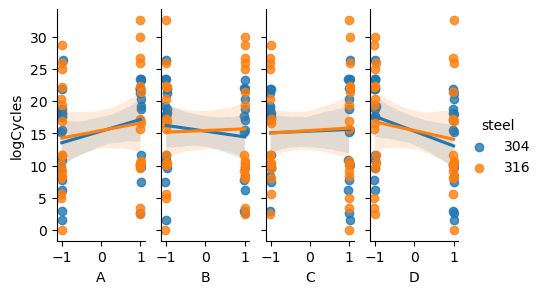

In [24]:
# Main effects
a = sns.PairGrid(df, y_vars=["logCycles"], x_vars=["A", "B",'C','D'],
                 hue ='steel', height=3, aspect =0.4 )  #palette ='coolwarm_r'
a.map(sns.regplot, x_jitter=.02)
a.add_legend()

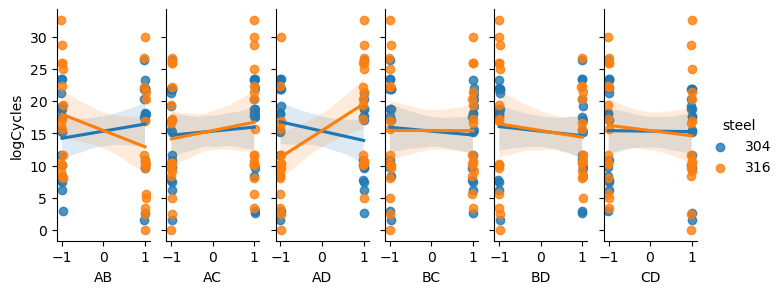

In [25]:
# Two factor interactions
ab = sns.PairGrid(df, y_vars=["logCycles"], x_vars=['AB','AC','AD','BC','BD','CD'],hue ='steel', height=3, aspect =0.4)
ab.map(sns.regplot, x_jitter=.02)
ab.add_legend()

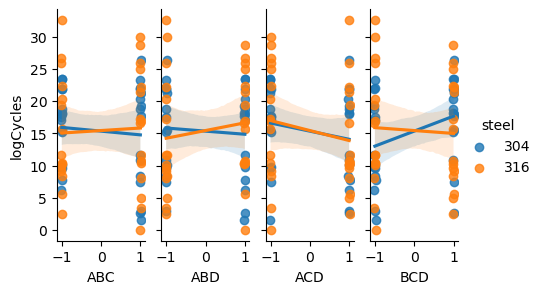

In [26]:
#Tree factors interactions
abc = sns.PairGrid(df, y_vars=["logCycles"], x_vars=['ABC','ABD', 'ACD','BCD'],hue ='steel', height=3, aspect =0.4)
abc.map(sns.regplot, x_jitter=.02)
abc.add_legend()

In [10]:
#Save the factor regplots

#a.savefig('./figs/main_effects.png', dpi=300)
#ab.savefig('./figs/two_factor_interactions.png', dpi=300)
#abc.savefig('./figs/three_factor_interactions.png',dpi=300)


## Calculation of main effects and interactions

In [35]:
steel_data = df.groupby('steel')['logCycles']
ttest_steel = ttest_rel(steel_data.get_group(304), steel_data.get_group(316))
ttest_steel

Ttest_relResult(statistic=-0.05145142010527425, pvalue=0.9592959235595815)

In [34]:
# Calculating the effects and p_values
labels = ['A','B','C','D','AB','AC','AD','BC','BD','CD','ABC','ABD', 'ACD','BCD']
from scipy.stats import ttest_rel

main_effects = {}
ttest = {}
for key in labels:
    
    grouped_data = df.groupby(key)['logCycles']
    effects = df.groupby(key)['logCycles'].mean()

    main_effects[key] = sum( [i*effects[i] for i in [-1,1]] )
    ttest[key] = (ttest_rel(grouped_data.get_group(-1) , grouped_data.get_group(1)))
ttest

{'A': Ttest_relResult(statistic=-1.654178305246469, pvalue=0.10818342234115683),
 'B': Ttest_relResult(statistic=0.27345266697516346, pvalue=0.78631894172571),
 'C': Ttest_relResult(statistic=-0.30342734832672474, pvalue=0.7635913343776825),
 'D': Ttest_relResult(statistic=1.7837883493091877, pvalue=0.08425111960194248),
 'AB': Ttest_relResult(statistic=0.6178701925790587, pvalue=0.5411738492225127),
 'AC': Ttest_relResult(statistic=-0.9077606211139242, pvalue=0.3710077164245891),
 'AD': Ttest_relResult(statistic=-1.2919047835308153, pvalue=0.20593890800864126),
 'BC': Ttest_relResult(statistic=0.2893178691178913, pvalue=0.774264297034549),
 'BD': Ttest_relResult(statistic=0.8220770228012354, pvalue=0.4173114477501466),
 'CD': Ttest_relResult(statistic=0.38263938775924966, pvalue=0.7045982239609181),
 'ABC': Ttest_relResult(statistic=0.08812440466608876, pvalue=0.9303446313884179),
 'ABD': Ttest_relResult(statistic=-0.3328005649190812, pvalue=0.7415250574884054),
 'ACD': Ttest_relResul

In [36]:
#Creation of dataframe with effects and p_values
ttests = pd.DataFrame(ttest)
p_values = ttests.loc[1,:]

main_effects_df = pd.DataFrame.from_dict(main_effects, orient='index', columns = ['effects'])
main_effects_df['abs_effects'] = np.abs(main_effects_df.effects) 
main_effects_df['p_values'] =p_values
main_effects_df['Regime parameters'] = main_effects_df.index
main_effects_sorted = main_effects_df.sort_values(by = 'abs_effects', ascending=False)
main_effects_sorted.round(3)

,effects,abs_effects,p_values,Regime parameters
D,-3.654,3.654,0.084,D
A,2.984,2.984,0.108,A
ACD,-2.824,2.824,0.222,ACD
AD,2.707,2.707,0.206,AD
AC,1.927,1.927,0.371,AC
BCD,1.885,1.885,0.316,BCD
BD,-1.750,1.750,0.417,BD
AB,-1.426,1.426,0.541,AB
CD,-0.886,0.886,0.705,CD
ABD,0.715,0.715,0.742,ABD


<ipython-input-9-3788f7ed2ce6>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


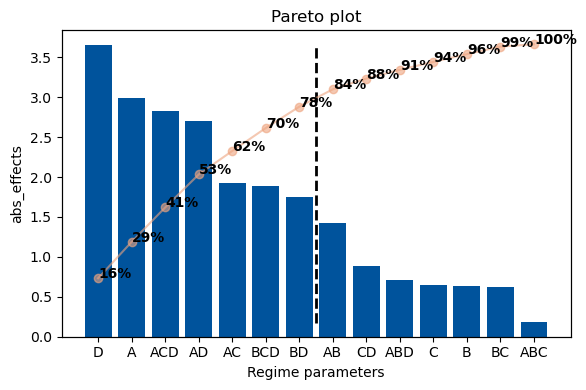

In [37]:
#Creation of the pareto plot

pareto_plot(main_effects_df, x='Regime parameters', y='abs_effects', title='Pareto plot', save=False)

#fig.savefig('./figs/pareto_plot.png', dpi=300)


# Creation of the regression model

In [41]:
import statsmodels.api as sm

In [43]:
x_param = df[['D', 'A','AD', 'AC','BD','ACD', 'BCD']]
y_pred = df['logCycles'] #-df.logCycles.mean()
# with statsmodels
X = sm.add_constant(x_param) # adding a constant
 
res = sm.OLS(y_pred, X).fit()
predictions = res.predict(X) 
 
print_model = res.summary(alpha = 0.1)
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              logCycles   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     1.948
Date:                Sat, 15 May 2021   Prob (F-statistic):             0.0789
Time:                        11:09:01   Log-Likelihood:                -215.46
No. Observations:                  64   AIC:                             446.9
Df Residuals:                      56   BIC:                             464.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
const         15.4010      0.937     16.435      0.0

In [47]:
resid=res.outlier_test()
print(resid)
#print('Parameters: ', res.params)
#print('Standard errors: ', res.bse)
#print('Predicted values: ', res.predict())

    student_resid   unadj_p  bonf(p)
0        0.871161  0.387453      1.0
1        0.841188  0.403885      1.0
2       -0.552379  0.582926      1.0
3        1.688650  0.096949      1.0
4       -0.513640  0.609561      1.0
..            ...       ...      ...
59      -0.580879  0.563695      1.0
60      -1.023111  0.310734      1.0
61      -2.109260  0.039489      1.0
62      -0.764558  0.447803      1.0
63       0.777474  0.440211      1.0

[64 rows x 3 columns]
